# A Beginner’s Guide to Carry out Extreme Value Analysis (with Codes in Python)-(1) Basic

## Introduction

Extreme value analysis (EVA) is a process that is used primarily to estimate of the probability of events that are more extreme than any previously observed. It is widely applied in many fields such as engineering, meteorology, hydrology, finance and ocean, etc.

The following presents basic steps to carry out EVA upond a time series data of interest based on open source python packages.   

## 1. Download Data

Download station data from https://www.ncdc.noaa.gov/. 
Here the daily summaries were downloaded using ghcnpy (https://github.com/jjrennie/GHCNpy).

An example is used as demo from the station of Ishinomaki.

* Firstly, check stations available in the selected area

In [1]:
import ghcnpy as gp

from past.builtins import xrange

gp.find_station("Ishinomaki")

D:\Miniconda3\Lib\site-packages\ghcnpy-1.0-py3.13.egg\ghcnpy\plotting.py:661: SyntaxWarning: invalid escape sequence '\c'
D:\Miniconda3\Lib\site-packages\ghcnpy-1.0-py3.13.egg\ghcnpy\plotting.py:957: SyntaxWarning: invalid escape sequence '\c'
D:\Miniconda3\Lib\site-packages\ghcnpy-1.0-py3.13.egg\ghcnpy\plotting.py:661: SyntaxWarning: invalid escape sequence '\c'
D:\Miniconda3\Lib\site-packages\ghcnpy-1.0-py3.13.egg\ghcnpy\plotting.py:957: SyntaxWarning: invalid escape sequence '\c'


LOOKUP BY STATION NAME:  Ishinomaki

GRABBING LATEST STATION METADATA FILE
GHCND ID          LAT        LON    ELEV  ST       STATION NAME
###############################################################
JA000047592   38.4330   141.3000    43.0      ISHINOMAKI                    


* Secondly, download data in csv format after finding the target station ID

In [2]:
gp.output_to_csv("JA000047592")


OUTPUTTING TO CSV:  JA000047592 .csv

GETTING DATA FOR STATION:  JA000047592


## 2. Load and Handle Time Series in Pandas

Pandas has dedicated libraries for handling time series(TS) objects, particularly the datatime64[ns] class which stores time information and allows us to perform some operations really fast. Lets start by firing up the required libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

#### load the data set and look at some initial rows and data types of the columns:

In [4]:
data = pd.read_csv('JA000047592.csv')
# print data.tail()
# print '\n Data Types:'
# print data.dtypes

In [5]:
data.tail()

,YYYY,MM,DD,TMAX,TMIN,PRCP,SNOW,SNWD
26828,2025,8,20,-9999.0,24.7,0.0,-9999.0,-9999.0
26829,2025,8,21,-9999.0,-9999.0,0.0,-9999.0,-9999.0
26830,2025,8,22,-9999.0,22.8,0.0,-9999.0,-9999.0
26831,2025,8,23,-9999.0,23.6,0.0,-9999.0,-9999.0
26832,2025,8,24,-9999.0,-9999.0,8.9,-9999.0,-9999.0


In [6]:
data.head()

,YYYY,MM,DD,TMAX,TMIN,PRCP,SNOW,SNWD
0,1951,1,1,-2.8,-6.6,0.8,-9999.0,-9999.0
1,1951,1,2,-1.1,-7.1,0.5,-9999.0,-9999.0
2,1951,1,3,2.0,-4.9,0.0,-9999.0,-9999.0
3,1951,1,4,0.9,-5.1,0.0,-9999.0,-9999.0
4,1951,1,5,-1.4,-6.4,0.0,-9999.0,-9999.0


#### Select annual maxima as extreme values

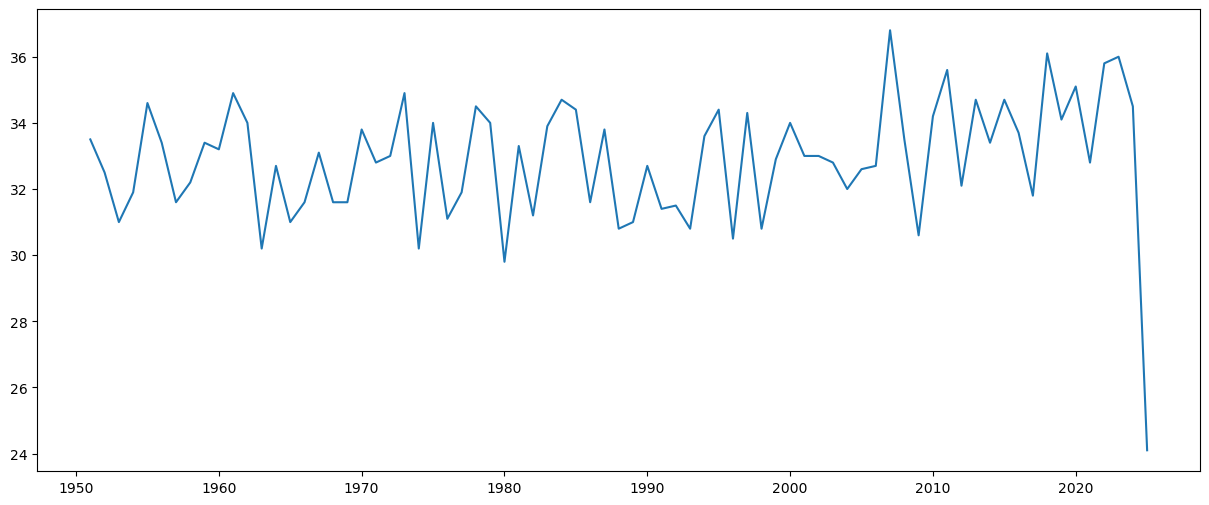

In [7]:
df = data.groupby("YYYY").TMAX.max()
plt.plot(df)

## 3. GEV Analysis

The Python3 version of L-moments is used to predict optimal parameters for a number of distributions (https://lmoments3.readthedocs.io/stable/). 

Distributions supported are listed below, with their distribution suffix:
* Exponential (EXP)
* Gamma (GAM)
* Generalised Extreme Value (GEV)
* Generalised Logistic (GLO)
* Generalised Normal (GNO)
* Generalised Pareto (GPA)
* Gumbel (GUM)
* Kappa (KAP)
* Normal (NOR)
* Pearson III (PE3)
* Wakeby (WAK)
* Weibull (WEI)
    
lmoments can be installed by
 * ```conda install -c conda-forge lmoments3```
 * ```pip install lmoments3```
 
 
As a demo, only the Generalised Extreme Value (GEV) distribution is used here.

### Import lmoments to carry out GEV analysis

In [8]:
import lmoments3 as lmoments

### Calculate moments

In [9]:
# LMU = lmoments.lmom_ratios(df)

LMU = lmoments.lmom_ratios(df, nmom=5)

In [10]:
lmoments.lmom_ratios?

Signature: lmoments.lmom_ratios(data, nmom=5)
Docstring:
Estimate `nmom` number of L-moments from a sample `data`.

:param data: Sequence of (sample) data
:type data: list or array-like sequence
:param nmom: number of L-moments to estimate
:type nmom: int
:return: L-moment ratios like this: l1, l2, t3, t4, t5, .. . As in: items 3 and higher are L-moment ratios.  # noqa: E501
:rtype: list
File:      d:\miniconda3\lib\site-packages\lmoments3\__init__.py
Type:      function

### Fit GEV distribution

In [11]:
#gevfit = lmoments.pelgev(LMU)
from lmoments3 import distr

In [12]:
gevfit = distr.gev.lmom_fit(LMU)

In [13]:
gevfit

OrderedDict([('c', np.float64(-0.9622515774604806)),
             ('loc', np.float64(-0.0069842746481096896)),
             ('scale', np.float64(0.2617720206696539))])

In [14]:
fitted_gev = distr.gev(**gevfit)

In [15]:
distr.gev?

Signature:      distr.gev(*args, **kwds)
Type:           GenextremeGen
String form:    <lmoments3.distr.GenextremeGen object at 0x000002A62CA71550>
File:           d:\miniconda3\lib\site-packages\lmoments3\distr.py
Docstring:      Generalized Extreme Value distribution with L-moment methods.
Call docstring:
Freeze the distribution for the given arguments.

Parameters
----------
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution.  Should include all
    the non-optional arguments, may include ``loc`` and ``scale``.

Returns
-------
rv_frozen : rv_frozen instance
    The frozen distribution.

In [16]:
fitted_gev.median()

np.float64(0.10805441349788866)

### Set some return years, and convert them into probabilities. 
Finally, get extreme values corresponding to these probabilities.

In [21]:
avi  = [2,5,10,20,50,100,200,500,1000];

pavi = np.empty(len(avi))
for i in range(len(avi)):
    pavi[i] = 1.0-1.0 / avi[i]
    print(pavi[i])

# gevqua = lmoments.quagev(pavi, gevfit)
# gevqua = distr.gev.fit(pavi, gevfit)

0.5
0.8
0.9
0.95
0.98
0.99
0.995
0.998
0.999


In [22]:
fitted_gev.ppf(pavi)

array([1.08054413e-01, 8.72995431e-01, 2.09269962e+00, 4.46209322e+00,
       1.13423333e+01, 2.24740176e+01, 4.41592711e+01, 1.07195241e+02,
       2.09219171e+02])

### Have a check 
The first one uses a log transformation of returen years.

Text(0.5, 1.0, 'GEV Distribution')

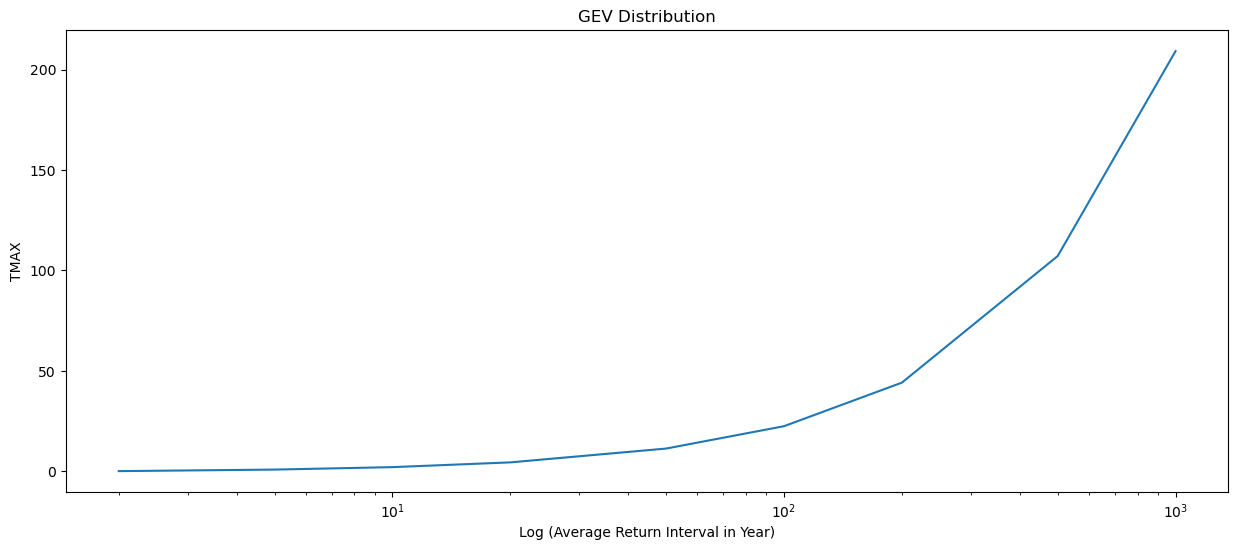

In [23]:
plt.plot(avi,fitted_gev.ppf(pavi))
plt.xscale('log')
plt.xlabel('Log (Average Return Interval in Year)')
plt.ylabel('TMAX')
plt.title("GEV Distribution")


The second one used the return years, directly

Text(0.5, 1.0, 'GEV Distribution')

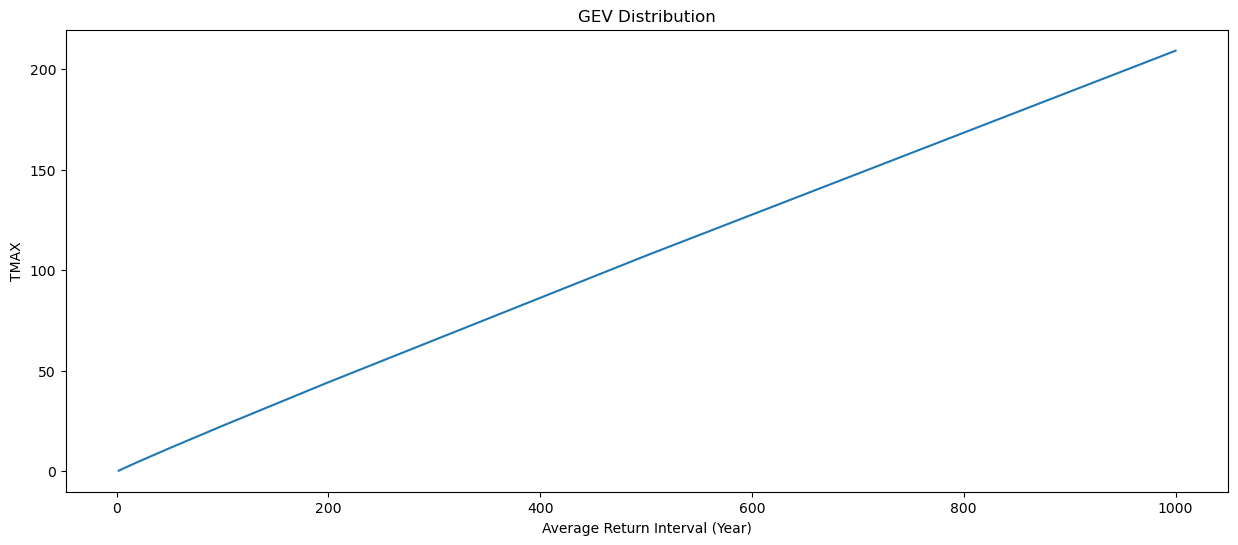

In [24]:
plt.plot(avi,fitted_gev.ppf(pavi))

plt.ylabel('TMAX')
plt.xlabel('Average Return Interval (Year)')
# plt.ylabel('TMAX')
plt.title("GEV Distribution")

## End Notes

Through this guide I have tried to give you a basic idea how to carry out extreme value analysis (EVA) upon a time series data of interest.

In fact, the analysis will become more complicated in a real practice as high quality data are not always available. Sometimes, you have to spend a lot of time cleaning the data. For example, fill the missing values and check outliers.

In addition, carrying out EVA always fits several distributions, simultaneouly. Then a goodness-of-fit measure (e.g., Anderson-Darling test) is used to select the optimal one.

This is just a start. You can try more.
